In [1]:
import numpy as np
import pandas as pd
 
# Set a random seed for reproducibility
np.random.seed(42)
 
# Parameters
n_samples = 1000  # Number of samples
 
# Group sizes
group_sizes = [30, 20, 10, 5]  # Number of variables in each group
independent_vars_count = 20  # Number of independent variables
 
# Total number of variables across all groups
total_group_vars = sum(group_sizes)
 
# Mean vector for the multivariate Gaussian distribution
mean = np.zeros(total_group_vars)  # Mean vector with length equal to the total number of group variables
 
# Given covariance matrix
cov_matrix = np.array([
    [1, 0, 0, 0],  # Covariance for group 1
    [0, 1, 0.8, 0.2],  # Covariance for group 2
    [0, 0.3, 1, 0.1],  # Covariance for group 3
    [0, 0.2, 0.1, 1]   # Covariance for group 4
])
 
# Create a full covariance matrix for the total number of variables
full_cov_matrix = np.zeros((total_group_vars, total_group_vars))
 
# Fill the full covariance matrix
start_index = 0
for size in group_sizes:
    end_index = start_index + size
    if size <= 4:
        full_cov_matrix[start_index:end_index, start_index:end_index] = cov_matrix[:size, :size]
    else:
        full_cov_matrix[start_index:end_index, start_index:end_index] = np.zeros((size, size))
        full_cov_matrix[start_index:start_index+4, start_index:start_index+4] = cov_matrix
        np.fill_diagonal(full_cov_matrix[start_index:end_index, start_index:end_index], 1.0)  # Variances for additional dimensions
    start_index = end_index
 
# Generate multivariate Gaussian variables for the combined groups
X_groups = np.random.multivariate_normal(mean, full_cov_matrix, n_samples)
 
# Generate independent variables
independent_vars = np.random.rand(n_samples, independent_vars_count)
 
# Combine all features
X = np.hstack((X_groups, independent_vars))
 
# Generate RUL values (as an example, using a linear combination of some features)
weights = np.random.rand(X.shape[1])  # Random weights for generating RUL
y = X @ weights + np.random.normal(0, 0.5, n_samples)  # Adding some noise
 
# Create a DataFrame
column_names = [f'Group_{i+1}_Var_{j+1}' for i, size in enumerate(group_sizes) for j in range(size)]
column_names += [f'Independent_Var_{i+1}' for i in range(independent_vars_count)]
data = pd.DataFrame(data=np.hstack((X, y.reshape(-1, 1))), columns=column_names + ['RUL'])
 
# Display the first few rows of the dataset

C:\Users\mlndao\AppData\Local\Temp\ipykernel_22344\3250111221.py:44: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X_groups = np.random.multivariate_normal(mean, full_cov_matrix, n_samples)


(65, 65)

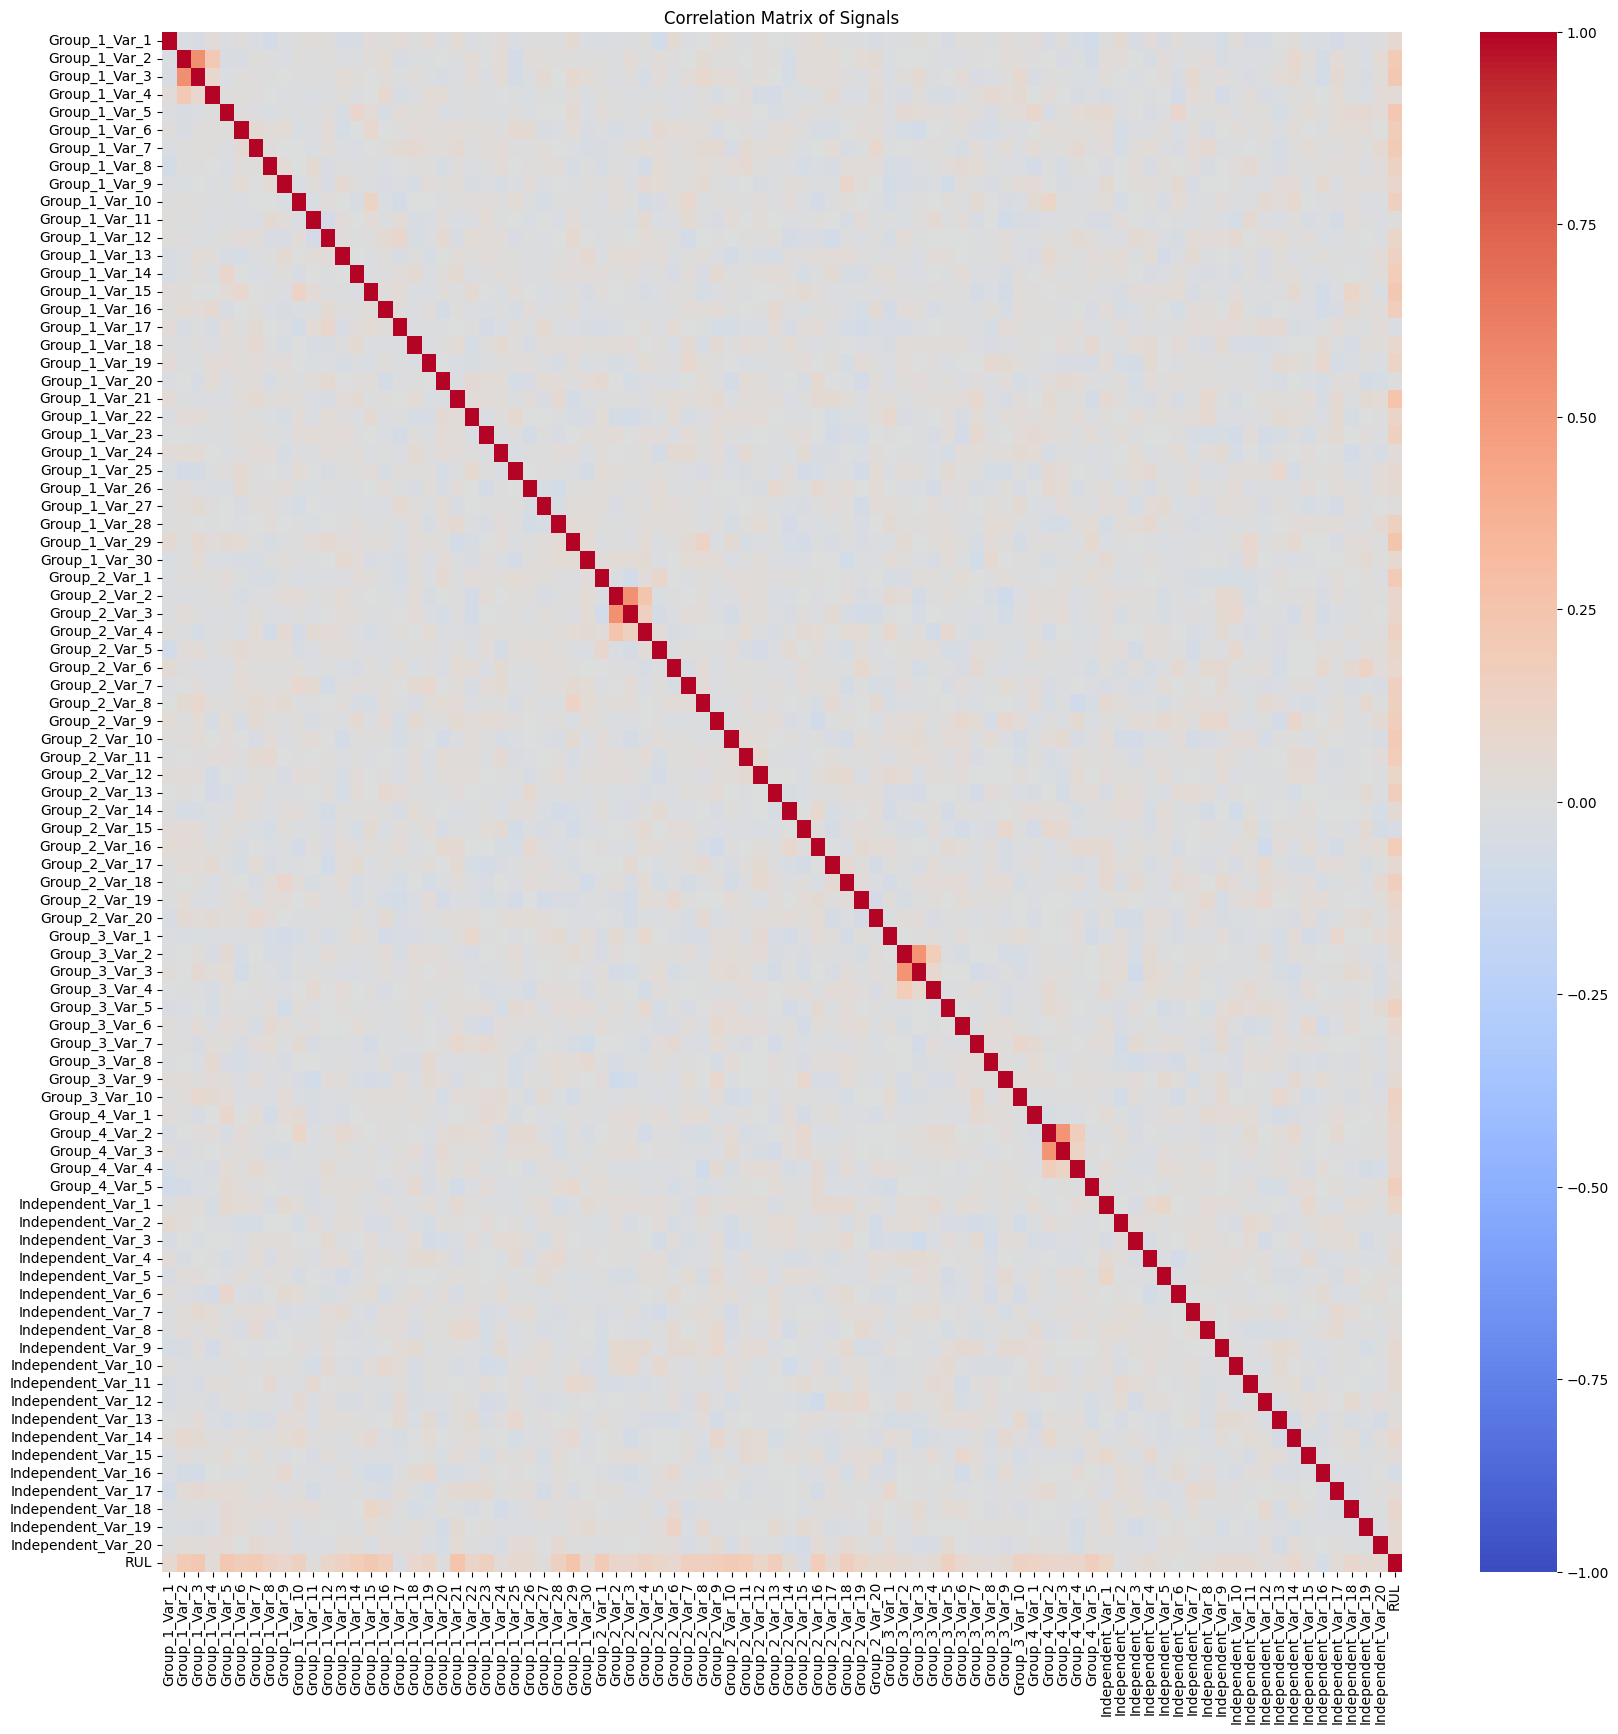

In [12]:
from varclushi import VarClusHi
import matplotlib.pyplot as plt
import seaborn as sns
X = data

# Calcul de la matrice de corrélation
correlation_matrix = X.corr(method='pearson')

# Affichage de la matrice de corrélation avec heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Signals")
plt.show()

In [6]:
# X.to_csv("data_cleaned/X_cleaned002.csv")
resclv = VarClusHi(X,maxeigval2=1,maxclus=None)
resclv.varclus()